#### This dofile guides you step by step through the data exploration. 
#### For each question, there is one or more lines of code that you have to write afterwards.
#### When there is a question, indicate the command that allows you to get the answer,
#### as well as the answer (but this one in comment).
#### The dofile that you will give me back must be as clean and clear as possible. 
#### And it must be enough to click on "Run" to get all the results.

############

### TEST : 1 #

############ 


### Q1 : Load the database suivi_distribution_dossiers_photos.xlsx in Python

In [1]:
#Import the necessary libraries
import pandas as pd

In [95]:
suivi_distribution=pd.read_excel('suivi_distribution_dossiers_photos.xlsx')

In [96]:
suivi_distribution.head()

,NOM_DOSSIER,NOMBRE_PHOTOS,NOMBRE DE PHOTO NEW,CONTIENT_TIERS,STATUT,TIERS_AGENT,TIERS_AGENT_2,TIERS_DATE_DONNE,CONTIENT_SALAIRES
0,01_02_17_PMB,NaN,246.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01_03_17_PMB,NaN,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2,01_06_17_PMB_CME,463,463.0,1,1.0,IS,MMF,NaN,NaN
3,01_08_17_PMB_CME,451,451.0,1,1.0,IS,ARN,NaN,NaN
4,01_12_16,NaN,43.0,NaN,0.0,NaN,NaN,NaN,1


### Q2: How many observations are there?

In [97]:
#Let's display the number of observations in the dataset
print('Number of observations in the dataset: ',len(suivi_distribution))

Number of observations in the dataset:  506


### Q3: In how many cases is the field NOM_DOSSIER empty?

In [98]:
#Let's count the number of times the file_name field values is empty
print('Number of times the Nom_Dossier field values is empty: ',len(suivi_distribution[suivi_distribution['NOM_DOSSIER'].isnull()]))

Number of times the Nom_Dossier field values is empty:  3


### Q4: Delete the observations for which the field NOM_DOSSIER is empty

In [99]:
#Delete the observations for which the field NOM_DOSSIER is empty.
suivi_distribution=suivi_distribution.dropna(subset=["NOM_DOSSIER"])

### Q5: Delete duplicates (observations that appear several times in the database)

In [100]:
#Let's identify the number of duplicates in the dataset
print('Number of duplicates in the dataset: ',len(suivi_distribution[suivi_distribution.duplicated()]))

Number of duplicates in the dataset:  38


In [101]:
#Let's delete the duplicates
suivi_distribution=suivi_distribution.drop_duplicates()

### Q6: Make sure the NOM_DOSSIER field a unique identifier now

In [102]:
#Let's identify the duplicates values in the field NOM_DOSSIER
suivi_distribution[suivi_distribution.duplicated(subset=['NOM_DOSSIER'],keep=False)]

,NOM_DOSSIER,NOMBRE_PHOTOS,NOMBRE DE PHOTO NEW,CONTIENT_TIERS,STATUT,TIERS_AGENT,TIERS_AGENT_2,TIERS_DATE_DONNE,CONTIENT_SALAIRES
221,18_09_17_PMB_CGE,NaN,147.0,1,1.0,SMN,NaN,2018-07-26 00:00:00,NaN
488,18_09_17_PMB_CGE,NaN,371.0,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#Let's replace the value '18_09_17_PMB_CGE' by the value '17_09_17_PMB_CGE' in the field NOM_DOSSIER where the field CONTENT_TIERS is empty
suivi_distribution.loc[(suivi_distribution['NOM_DOSSIER']=='18_09_17_PMB_CGE') & (suivi_distribution['CONTIENT_TIERS'].isnull()),'NOM_DOSSIER']='17_09_17_PMB_CGE'

In [104]:
#Let's check if there are no more duplicates values in the field NOM_DOSSIER
suivi_distribution[suivi_distribution.duplicated(subset=['NOM_DOSSIER'],keep=False)]

,NOM_DOSSIER,NOMBRE_PHOTOS,NOMBRE DE PHOTO NEW,CONTIENT_TIERS,STATUT,TIERS_AGENT,TIERS_AGENT_2,TIERS_DATE_DONNE,CONTIENT_SALAIRES


###  Q8 : Replace NOMBREDEPHOTONEW by its numerical version.  
     Do the same for all the variables that seem to be numeric. 
     Force the replacement if necessary. 

In [105]:
#Let's first check the types of the different fiels in our dataset
suivi_distribution.dtypes

NOM_DOSSIER             object
NOMBRE_PHOTOS           object
NOMBRE DE PHOTO NEW    float64
CONTIENT_TIERS          object
STATUT                 float64
TIERS_AGENT             object
TIERS_AGENT_2           object
TIERS_DATE_DONNE        object
CONTIENT_SALAIRES       object
dtype: object

In [106]:
#Let's convert the field NOMBRE_PHOTOS to a string
suivi_distribution['NOMBRE_PHOTOS']=suivi_distribution['NOMBRE_PHOTOS'].astype(str)

In [107]:
#Let's removing all the leading and trailing spaces in the field NOMBRE_PHOTOS
suivi_distribution['NOMBRE_PHOTOS']=suivi_distribution['NOMBRE_PHOTOS'].str.strip()

In [108]:
suivi_distribution['NOMBRE_PHOTOS'].unique()

array(['nan', '463', '451', '506', '461', '365', '371', '548', '416',
       '367', '359', '474', '318', '411', '241', '632', '491', '456',
       '479', '542', '413', '', '689', '354', '220', '311', '124', '559',
       '364', '198', '271', '334', '386', '679', '238', '384', '586',
       '475', '442', '408', '399', '356', '276', '323', '457', '298',
       '454', '425', '478', '232', '309', '105', '460', '251', '352',
       '335', '458', '81', '497', '0', '434', '427', '324', '436', '180',
       '246', '527', '379', '522', '405', '109', '203', '437', '348',
       '495', '319', '414', '402', '244', '73', '55', '313', '403', '305',
       '366', '293', '501', '308', '35', '21', '51', '814', '300', '351',
       '417', '123', '56', '490', '739', '346', '137', '686', '182',
       '650', '432', '336', '338', '74', '193', '330', '390', '361',
       '440', '789', '48', '388', '317', '410', '218', '160', '204',
       '349', '406', '303', '290', '118', '89', '173', '14', '57', '685',
  

In [109]:
#Let's replace the 'nan', ' ' with '0' values in the field NOMBRE_PHOTOS
suivi_distribution['NOMBRE_PHOTOS']=suivi_distribution['NOMBRE_PHOTOS'].replace(['nan',' ','', ''],'0')

In [110]:
suivi_distribution['NOMBRE_PHOTOS'].unique()

array(['0', '463', '451', '506', '461', '365', '371', '548', '416', '367',
       '359', '474', '318', '411', '241', '632', '491', '456', '479',
       '542', '413', '689', '354', '220', '311', '124', '559', '364',
       '198', '271', '334', '386', '679', '238', '384', '586', '475',
       '442', '408', '399', '356', '276', '323', '457', '298', '454',
       '425', '478', '232', '309', '105', '460', '251', '352', '335',
       '458', '81', '497', '434', '427', '324', '436', '180', '246',
       '527', '379', '522', '405', '109', '203', '437', '348', '495',
       '319', '414', '402', '244', '73', '55', '313', '403', '305', '366',
       '293', '501', '308', '35', '21', '51', '814', '300', '351', '417',
       '123', '56', '490', '739', '346', '137', '686', '182', '650',
       '432', '336', '338', '74', '193', '330', '390', '361', '440',
       '789', '48', '388', '317', '410', '218', '160', '204', '349',
       '406', '303', '290', '118', '89', '173', '14', '57', '685', '469',
      

In [111]:
#I want to cast the field NOMBRE_PHOTOS as an integer, the STATUS as a string, the TIERS_DATE_DONNE as a datetime
suivi_distribution['NOMBRE_PHOTOS']=suivi_distribution['NOMBRE_PHOTOS'].astype(int)
suivi_distribution['STATUT']=suivi_distribution['STATUT'].astype(str)

In [112]:
suivi_distribution['NOMBRE_PHOTOS'].unique()

array([  0, 463, 451, 506, 461, 365, 371, 548, 416, 367, 359, 474, 318,
       411, 241, 632, 491, 456, 479, 542, 413, 689, 354, 220, 311, 124,
       559, 364, 198, 271, 334, 386, 679, 238, 384, 586, 475, 442, 408,
       399, 356, 276, 323, 457, 298, 454, 425, 478, 232, 309, 105, 460,
       251, 352, 335, 458,  81, 497, 434, 427, 324, 436, 180, 246, 527,
       379, 522, 405, 109, 203, 437, 348, 495, 319, 414, 402, 244,  73,
        55, 313, 403, 305, 366, 293, 501, 308,  35,  21,  51, 814, 300,
       351, 417, 123,  56, 490, 739, 346, 137, 686, 182, 650, 432, 336,
       338,  74, 193, 330, 390, 361, 440, 789,  48, 388, 317, 410, 218,
       160, 204, 349, 406, 303, 290, 118,  89, 173,  14,  57, 685, 469,
       250, 494, 153,  31, 331, 165, 240, 102,  22, 568, 223, 484, 256,
       280, 111, 233, 277])

### Q10: Replace lower case characters by upper case characters for all variables that are not numeric.

In [113]:
suivi_distribution.columns

Index(['NOM_DOSSIER', 'NOMBRE_PHOTOS', 'NOMBRE DE PHOTO NEW', 'CONTIENT_TIERS',
       'STATUT', 'TIERS_AGENT', 'TIERS_AGENT_2', 'TIERS_DATE_DONNE',
       'CONTIENT_SALAIRES'],
      dtype='object')

In [114]:
#Replace lower case characters by upper case characters for the variables 'NOM_DOSSIER', 'TIERS_AGENT' and 'TIERS_AGENT_2'.
suivi_distribution['NOM_DOSSIER']=suivi_distribution['NOM_DOSSIER'].apply(lambda x: x.upper() if type(x)==str else x)
suivi_distribution['TIERS_AGENT']=suivi_distribution['TIERS_AGENT'].apply(lambda x: x.upper() if type(x)==str else x)
suivi_distribution['TIERS_AGENT_2']=suivi_distribution['TIERS_AGENT_2'].apply(lambda x: x.upper() if type(x)==str else x)

### Q11 : Empty all the boxes that contain ONLY spaces

In [115]:
#Empty all the boxes that contain ONLY spaces
suivi_distribution['NOM_DOSSIER']=suivi_distribution['NOM_DOSSIER'].apply(lambda x: '' if type(x)==str and x.isspace() else x)
suivi_distribution['TIERS_AGENT']=suivi_distribution['TIERS_AGENT'].apply(lambda x: '' if type(x)==str and x.isspace() else x)
suivi_distribution['TIERS_AGENT_2']=suivi_distribution['TIERS_AGENT_2'].apply(lambda x: '' if type(x)==str and x.isspace() else x)

### Q12: How many different values can the variables TIERS_AGENT and TIERS_AGENT_2 take?

In [116]:
#Let's output the different values the variables TIERS_AGENT is taking
#Bare in mind the nan values are not displayed
print('The number of different values the variable TIERS_AGENT is taking is: ', suivi_distribution['TIERS_AGENT'].apply(lambda x: x if (x != '' and str(x) != 'nan') else None).dropna().nunique())

The number of different values the variable TIERS_AGENT is taking is:  16


In [117]:
#Let's output the different values the variables TIERS_AGENT_2 is taking
#Bare in mind the nan values are not displayed
print('The number of different values the variable TIERS_AGENT_2 is taking is: ', suivi_distribution['TIERS_AGENT_2'].apply(lambda x: x if (x != '' and str(x) != 'nan') else None).dropna().nunique())

The number of different values the variable TIERS_AGENT_2 is taking is:  6


### Q13: In what proportion (as a percentage) is there a value in TIERS_AGENT but not in TIERS_AGENT_2? 
    # (take the number of non-empty values in TIERS_AGENT as the denominator)

In [118]:
# count the number of non-empty values in TIERS_AGENT and TIERS_AGENT_2
num_agent = suivi_distribution['TIERS_AGENT'].apply(lambda x: x != '' and str(x)!='nan').sum()
num_agent_2 = suivi_distribution['TIERS_AGENT_2'].apply(lambda x: x != '' and str(x)!='nan').sum()

# count the number of non-empty values that appear in both columns
num_both_agents = (((suivi_distribution['TIERS_AGENT'] != '') & (suivi_distribution['TIERS_AGENT'].notnull())) & ((suivi_distribution['TIERS_AGENT_2'] != '') & (suivi_distribution['TIERS_AGENT_2'].notnull()))).sum()

# calculate the proportion of non-empty TIERS_AGENT values that do not have a corresponding non-empty TIERS_AGENT_2 value
proportion = (num_agent - num_both_agents) / num_agent * 100

print(proportion)

98.2532751091703


### Q14: Calculate the TOTAL and AVERAGE number of photos (using the variable NOMBRE DE PHOTO NEW) entered by each agent (TIERS_AGENT).

In [119]:
#Calculate the TOTAL and AVERAGE number of photos (using the variable NOMBRE DE PHOTO NEW) entered by each agent (TIERS_AGENT)
suivi_distribution.groupby('TIERS_AGENT')['NOMBRE DE PHOTO NEW'].agg(['sum','mean'])

,sum,mean
TIERS_AGENT,,
,518.0,64.750000
AMD,2816.0,187.733333
ARN,6721.0,448.066667
CBN,975.0,162.500000
DD,7601.0,361.952381
ELM,883.0,176.600000
FBD,8295.0,331.800000
FM,1062.0,177.000000
IS,12335.0,397.903226


### Q15: How many cases is the variable NUMBER_PHOTOS different from NOMBRE DE PHOTO NEW?

In [120]:
#How many cases is the variable NOMBRE_PHOTOS different from NOMBRE DE PHOTO NEW?
len(suivi_distribution[suivi_distribution['NOMBRE_PHOTOS']!=suivi_distribution['NOMBRE DE PHOTO NEW']])

323

### Q16: With some exceptions (there are some), the variable NOM_DOSSIER is composed of three concatenated pieces of information: 
         date (day_month_year), tax center (DGE, TGE, DME, DKEDK1, DMEDK2, or DP), agent (PMB, PMBMB, AF, or MGIN), and a suffix (A2016, A2017, OTHER, A, B)
        a) separate these elements. 
        b) calculate the total number of photos per fiscal center (assigning to DGE all the files where the indication on the fiscal center is missing)

#### a) Let's separate these elements

In [121]:
#The variable NOM_DOSSIER is composed of three concatenated pieces of information: date (day_month_year),  tax center (DGE, TGE, DME, DKEDK1, DMEDK2, or DP), agent (PMB, PMBMB, AF, or MGIN' and a suffix (A2016, A2017, OTHER, A, B), separate these elements.
suivi_distribution['Jour']=suivi_distribution['NOM_DOSSIER'].str.split('_').str[0]
suivi_distribution['Mois']=suivi_distribution['NOM_DOSSIER'].str.split('_').str[1]
suivi_distribution['Annee']=suivi_distribution['NOM_DOSSIER'].str.split('_').str[2]
suivi_distribution['Centre']=suivi_distribution['NOM_DOSSIER'].str.split('_').str[3]
suivi_distribution['Agent']=suivi_distribution['NOM_DOSSIER'].str.split('_').str[4]
suivi_distribution['Suffixe']=suivi_distribution['NOM_DOSSIER'].str.split('_').str[5]

#### b) Let's calculate the total number of photos per fiscal center (assigning to DGE all the files where the indication on the fiscal center is missing)

In [122]:
#Let's calculate the total number of photos per fiscal center (assigning to DGE all the files where the indication on the fiscal center is missing)
suivi_distribution['Centre']=suivi_distribution['Centre'].fillna('DGE')
suivi_distribution.groupby('Centre')['NOMBRE_PHOTOS'].sum()

Centre
                  343
17                111
AF               7146
CGE              1874
CME              6245
DGE               394
DMEDK1           1055
DMEDK1-PMBMB      691
DP                263
MGIN                0
PBM              3574
PMB             36714
TGE               194
Name: NOMBRE_PHOTOS, dtype: int32

############
  
  # TEST: 2 # 
  
  ############ 
  
  ##### In this database you have 4 variables : 
  ##### IDAGENT: identifier of the agent who entered the declaration
  ##### NAME: the name of the company that submitted the declaration
##### NINEA: the tax identifier of the company that submitted the declaration
##### YEAR: the year of the declaration

### Q1 : Load the database suivi_saisie_Salaires.xlsx
    ### be careful to import the variable names

In [123]:
#Let's load the data set suivi_saisie_Salaires.xlsx
suivi_saisie=pd.read_excel('suivi_saisie_Salaires.xlsx')

In [124]:
suivi_saisie.head(3)

,ID AGENT,NOM,NINEA,ANNEE
0,PAF,LES,0000179222G3,2013
1,PAF,LES,0000179222G3,2015
2,PAF,LES,0000179222G3,2015


In [125]:
suivi_saisie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25892 entries, 0 to 25891
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID AGENT  25892 non-null  object
 1   NOM       25885 non-null  object
 2   NINEA     25154 non-null  object
 3   ANNEE     25780 non-null  object
dtypes: object(4)
memory usage: 809.2+ KB


### Q2: Create a variable that counts the number of duplicates per group of repeated observations. Then delete the duplicates

In [126]:
#Let's create a variable that counts the number of duplicates per group of repeated observations. Then delete the duplicates
suivi_saisie=suivi_saisie.drop_duplicates()

### NAME CLEANING #####
  
  ### Q3: Remove double spaces, unnecessary spaces (at the beginning or end of a box), capitalize ### everything, remove special characters...
### ... in short, do whatever you think is best to clean up the NOM field

In [127]:
#Remove double spaces, unnecessary spaces (at the beginning or end of a box), capitalize  everything, remove special characters from the field NOM
suivi_saisie['NOM']=suivi_saisie['NOM'].str.replace('  ',' ', regex=True).str.strip().str.upper().str.replace('[^A-Z0-9]','')

C:\Users\dell\AppData\Local\Temp\ipykernel_3964\120903747.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  suivi_saisie['NOM']=suivi_saisie['NOM'].str.replace('  ',' ', regex=True).str.strip().str.upper().str.replace('[^A-Z0-9]','')


###  Q4: remove the legal acronyms (SA, SARL, SUARL, GIE) and put them in a separate variable 
    ### - be careful not to confuse them with expressions that are not legal acronyms
    ### e.g.: when you remove "GIE" do not replace TECHNOLOGY by TECHNOLO...

In [128]:
suivi_saisie.columns

Index(['ID AGENT', 'NOM', 'NINEA', 'ANNEE'], dtype='object')

In [129]:
suivi_saisie["NOM"]=suivi_saisie["NOM"].astype(str)

In [130]:
#Let's create another column that contains the following values SA, SARL, SUARL, GIE which are the first letters of the values of the field NOM
suivi_saisie["company type"]=suivi_saisie["NOM"].apply(lambda x: "GIE" if x.startswith("GIE") else "SA" if x.startswith("SA") else "SARL" if x.startswith("SARL") else "SUARL" if x.startswith("SUARL") else "Other")

In [131]:
suivi_saisie.head(10)

,ID AGENT,NOM,NINEA,ANNEE,company type
0,PAF,LES,0000179222G3,2013,Other
1,PAF,LES,0000179222G3,2015,Other
3,PAF,PETROSEN,0000244982G3,2015,Other
7,DD,UNIPARCO,0000365922G3,2015,Other
10,NNB,ENTGENIECIVILCONC,0000383582G1,2015,Other
11,ARN,SODIALSA,0000388612G3,2015,Other
16,PAF,SSPC,0000715302G3,2015,Other
17,NNB,OCEANPESCA2SA,0000773642G3,2015,Other
20,PAF,JLSSA,0000814722G3,2015,Other
27,ARN,DELTAMEDICALSARL,0000847312G2,2015,Other


### Q5: Based on the variable NOM, how many companies' returns were entered per year? 

In [132]:
suivi_saisie["ANNEE"]=suivi_saisie["ANNEE"].astype(str)

In [133]:
suivi_saisie["ANNEE"]=suivi_saisie["ANNEE"].apply(lambda x: x.split()[0] if "suite" in x else x)

In [134]:
#Based on the variable NAME, how many companies' returns were entered per year? 
suivi_saisie.groupby('ANNEE')['NOM'].agg([('Total declarations', 'count'), ('Number of companies', 'nunique')])


,Total declarations,Number of companies
ANNEE,,
2009,1,1
2011,6,6
2012,979,951
2013,1486,1428
2014,1597,1493
2015,1884,1684
2016,1450,1391
2017,1,1
2021,1,1


### NINEA CLEANING ######
  
  ### NINEA is a 9 digit tax ID (often starting with 0's). 
  ### The problem with this database is 
    ### a) a three-character suffix (the COFI) has been added here in many cases at the end; and  
    ### b) that the 0s at the beginning have often been discarded
  ### We want to correct the NINEA variable by separating the real NINEA from the COFI as follows: 
  ### if FOR EXAMPLE, NINEA = 23137902G3
  ### then we want NINEA = 002313790 and COFI = "2G3

### Q6 : Remove the COFI from the NINEA variable and store it in a separate variable that you will create

In [135]:
suivi_saisie["NINEA"]=suivi_saisie["NINEA"].astype(str)

In [136]:
#I want to put the last 3 characters of the variable NINEA in a new variable called COFI and then delete the last 3 characters of the variable NINEA and then add 0's as prefix to the variable NINEA to ensure that all the values have the same length of 9 characters
suivi_saisie["COFI"]=suivi_saisie["NINEA"].apply(lambda x: x[-3:])
suivi_saisie["NINEA"]=suivi_saisie["NINEA"].apply(lambda x: x[:-3])

### Q7 : add the missing 0 to get 9 characters

In [137]:
#add the missing 0 to get 9 characters
suivi_saisie["NINEA"]=suivi_saisie["NINEA"].apply(lambda x: x.zfill(9))

### Q8: Based on the NINEA variable, how many companies' returns were entered per year?

In [138]:
#Based on the NINEA variable, how many companies' returns were entered per year?
suivi_saisie.groupby('ANNEE')['NINEA'].agg([('Total declarations', 'count'), ('Number of companies', 'nunique')])

,Total declarations,Number of companies
ANNEE,,
2009,1,1
2011,6,6
2012,979,929
2013,1486,1380
2014,1597,1447
2015,1884,1577
2016,1450,1357
2017,1,1
2021,1,1


### Q9: compare your results to Q8 and Q5 - how do you explain them? 

### We have less number of companies when we count the number of companies wrt to the field NINEA than wrt to the field NOM. This means that there are different companies (companies with different names) that have the same NINEA

############
  
### TEST: 3 # 
  
  ############ 
  
###  In this base you have 7 variables that describe the decomposition of tax revenues by month year and  ### tax center 
### center: a code for the tax center
### year: the year of tax revenue for this center
### month: the month of tax revenue for this year and this center
### impot_1 impot_2 impot_3: the tax revenues (in CFA francs) of three different taxes (but not all taxes ### together)
### total : the total of tax revenues (note the total is greater than the sum of the three taxes available ### because there are other taxes for which you don't have the details here)

### Q1 : load the database recettes_fiscales.xlsx
### be careful to import the variable names

In [2]:
recettes_fiscales=pd.read_excel("recettes_fiscales.xlsx")

In [3]:
recettes_fiscales.head(3)

,centre,annee,mois,impot_1,impot_2,impot_3,total
0,1,2013,1,0,120147880,16345581,206297632
1,2,2013,1,3859547,465166720,159782144,801838208
2,3,2013,1,13285397,834311232,578353792,1961875712


In [4]:
recettes_fiscales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   centre   1512 non-null   int64
 1   annee    1512 non-null   int64
 2   mois     1512 non-null   int64
 3   impot_1  1512 non-null   int64
 4   impot_2  1512 non-null   int64
 5   impot_3  1512 non-null   int64
 6   total    1512 non-null   int64
dtypes: int64(7)
memory usage: 82.8 KB


### Q2: Aggregate data to move from a month-year-center table to a year-center table

In [6]:
#Let's aggregate data to move from a month-year-center table to a year-center table
recettes_fiscales_aggregate=recettes_fiscales.groupby(['annee','centre']).sum().reset_index()

In [7]:
recettes_fiscales_aggregate

,annee,centre,mois,impot_1,impot_2,impot_3,total
0,2013,1,78,55394905,309958824,597913731,1748073296
1,2013,2,78,779530918,6735125728,1971907968,13636057600
2,2013,3,78,3996097849,10236036032,10838090528,34062735616
3,2013,4,78,21266496,142619479,574537624,922423802
4,2013,5,78,406381013,1769891816,1069279772,6711063008
...,...,...,...,...,...,...,...
121,2019,14,78,302170438,807930168,989648006,6787434592
122,2019,15,78,209591973,1367103264,821453768,3634728016
123,2019,16,78,77705905,512599708,776757911,3081042224
124,2019,17,78,915203714,1501248992,1328426604,9594600544


### Q3 (FREE): Create a few clean and readable graphs to extract the most relevant information from this ### table on tax revenues, their evolution and their breakdown. 
### Accompany the code here for each graph with a commentary to help read the graph and explain the main ### message(s) to remember.


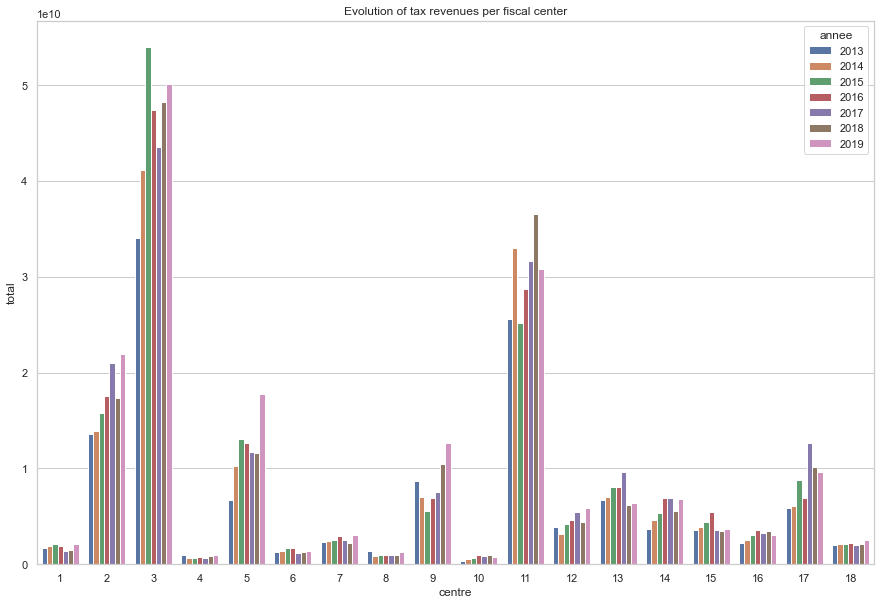

In [9]:
#Let's create a graph that shows the evolution of tax revenues per fiscal center
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="centre", y="total", hue="annee", data=recettes_fiscales_aggregate)
plt.title('Evolution of tax revenues per fiscal center')
plt.show()


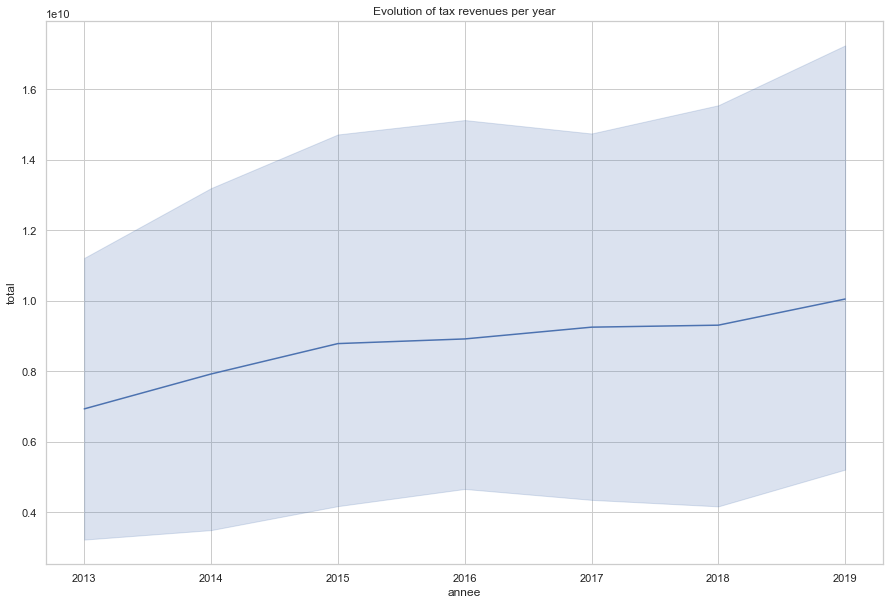

In [10]:
#Let's create a line chart that shows the evolution of tax revenues(the field total) per year
plt.figure(figsize=(15, 10))
ax = sns.lineplot(x="annee", y="total", data=recettes_fiscales_aggregate)
plt.title('Evolution of tax revenues per year')
plt.show()